In [112]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import os
import pandas as pd
import numpy as np

In [40]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [41]:
numpy.random.seed(1)

In [42]:
url=r'/Users/cherry/Desktop/all/'
nvdia_data=os.path.join(url,'nvda.us.fmt.editedrows.csv')
dataframe = read_csv(nvdia_data, engine='python')
dataset = dataframe.values
dataset

array([['3/5/99', 1.429, 1.429, 1.3824, 1.4196, 228930],
       ['4/5/99', 1.4196, 1.4196, 1.3175, 1.3454, 647342],
       ['5/5/99', 1.3546, 1.3732, 1.2712, 1.3732, 976188],
       ...,
       ['17/10/18', 248.34, 249.88, 241.08, 243.06, 8225703],
       ['18/10/18', 245.86, 247.41, 237.09, 239.53, 13066440],
       ['19/10/18', 241.76, 242.55, 227.7, 229.17, 15323210]],
      dtype=object)

In [43]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset[:,[1]])

/Users/cherry/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [44]:
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [45]:
look_back = 9
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [47]:
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [48]:
batch_size = 20
model6 = Sequential()
model6.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model6.add(Dense(1))
model6.compile(loss='mean_squared_error', optimizer='adam')
for i in range(10):
    model6.fit(trainX, trainY, epochs=10, batch_size=batch_size, verbose=2, shuffle=False)


Epoch 1/10
 - 2s - loss: 6.3125e-05
Epoch 2/10
 - 1s - loss: 3.5766e-05
Epoch 3/10
 - 1s - loss: 2.5888e-05
Epoch 4/10
 - 1s - loss: 2.1270e-05
Epoch 5/10
 - 1s - loss: 1.8930e-05
Epoch 6/10
 - 1s - loss: 1.7670e-05
Epoch 7/10
 - 1s - loss: 1.6936e-05
Epoch 8/10
 - 1s - loss: 1.6457e-05
Epoch 9/10
 - 1s - loss: 1.6103e-05
Epoch 10/10
 - 1s - loss: 1.5805e-05
Epoch 1/10
 - 1s - loss: 1.5536e-05
Epoch 2/10
 - 1s - loss: 1.5282e-05
Epoch 3/10
 - 1s - loss: 1.5035e-05
Epoch 4/10
 - 1s - loss: 1.4796e-05
Epoch 5/10
 - 1s - loss: 1.4564e-05
Epoch 6/10
 - 1s - loss: 1.4337e-05
Epoch 7/10
 - 1s - loss: 1.4111e-05
Epoch 8/10
 - 1s - loss: 1.3887e-05
Epoch 9/10
 - 1s - loss: 1.3660e-05
Epoch 10/10
 - 1s - loss: 1.3435e-05
Epoch 1/10
 - 1s - loss: 1.3207e-05
Epoch 2/10
 - 1s - loss: 1.2973e-05
Epoch 3/10
 - 1s - loss: 1.2738e-05
Epoch 4/10
 - 1s - loss: 1.2500e-05
Epoch 5/10
 - 1s - loss: 1.2260e-05
Epoch 6/10
 - 1s - loss: 1.2018e-05
Epoch 7/10
 - 1s - loss: 1.1773e-05
Epoch 8/10
 - 1s - loss: 1

In [49]:
trainPredict = model6.predict(trainX, batch_size=batch_size)
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
model6.reset_states()

testPredict = model6.predict(testX, batch_size=batch_size)
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.00 RMSE
Test Score: 0.01 RMSE


In [50]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [51]:
trainPredict.shape
trainY=trainY.reshape(-1,1)
trainY.shape

(3420, 1)

In [52]:
testPredict.shape
testY=testY.reshape(-1,1)
testY.shape

(1460, 1)

In [53]:
testPredict

array([[ 11.834654],
       [ 12.057015],
       [ 12.13163 ],
       ...,
       [240.74887 ],
       [236.72667 ],
       [241.06166 ]], dtype=float32)

In [54]:
testY

array([[ 11.886],
       [ 11.905],
       [ 12.27 ],
       ...,
       [239.93 ],
       [248.34 ],
       [245.86 ]])

In [55]:
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 3.81 RMSE


In [56]:
trainY=trainY.reshape(-1,1)
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))

Train Score: 0.54 RMSE


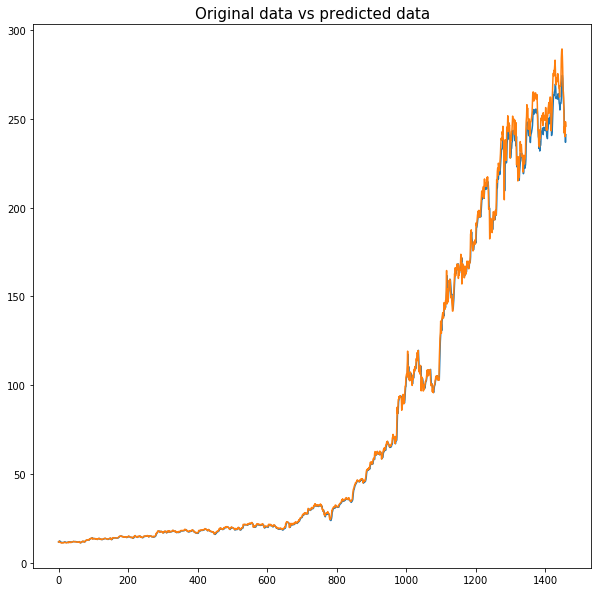

In [57]:
testY=testY.reshape(-1,1)
plt.figure(figsize=(10, 10))
plt.plot(testPredict)
plt.plot(testY)
plt.title('Original data vs predicted data', fontsize=15)
plt.show()

In [78]:
testPredict

array([[ 11.834654],
       [ 12.057015],
       [ 12.13163 ],
       ...,
       [240.74887 ],
       [236.72667 ],
       [241.06166 ]], dtype=float32)

In [74]:
testY

array([[ 11.886],
       [ 11.905],
       [ 12.27 ],
       ...,
       [239.93 ],
       [248.34 ],
       [245.86 ]])

In [62]:
dataframe

array([[0.03644212],
       [0.03666433],
       [0.03591785],
       ...,
       [0.85771876],
       [0.84910828],
       [0.83487321]])

In [103]:
values_date=dataframe['Date'][len(train)+9:].values

In [168]:
predict_lowerdimen = testPredict.ravel()
actual_lowerdimen=testY.ravel()

In [169]:
train_final=[]
for i in range(len(values_date)-1):
    
    train_final.append([predict_lowerdimen[i],actual_lowerdimen[i],values_date[i]])
    
    i=i+1
    
    
    
    

In [149]:
type([values_date[i]])

list

In [170]:
train_final

[[11.834654, 11.886, '3/1/13'],
 [12.057015, 11.905, '4/1/13'],
 [12.13163, 12.27, '7/1/13'],
 [12.4407215, 11.952, '8/1/13'],
 [12.266832, 11.757, '9/1/13'],
 [12.064237, 11.505, '10/1/13'],
 [11.808924, 11.459000000000001, '11/1/13'],
 [11.702966, 11.477, '14/01/13'],
 [11.687633, 11.335999999999999, '15/01/13'],
 [11.572905, 11.195, '16/01/13'],
 [11.433002, 11.325999999999999, '17/01/13'],
 [11.502785, 11.439, '18/01/13'],
 [11.615204, 11.356, '22/01/13'],
 [11.580794, 11.345999999999998, '23/01/13'],
 [11.5653925, 11.288, '24/01/13'],
 [11.51561, 11.4, '25/01/13'],
 [11.591983, 11.644, '28/01/13'],
 [11.806196, 11.728, '29/01/13'],
 [11.928184, 11.534, '30/01/13'],
 [11.804412, 11.505, '31/01/13'],
 [11.628023, 11.495999999999999, '1/2/13'],
 [11.604644, 11.485999999999999, '4/2/13'],
 [11.588816, 11.41, '5/2/13'],
 [11.520155, 11.335999999999999, '6/2/13'],
 [11.44146, 11.485999999999999, '7/2/13'],
 [11.539351, 11.553, '8/2/13'],
 [11.619969, 11.644, '11/2/13'],
 [11.71462, 11.5

In [172]:
numpy.savetxt('/Users/cherry/datasetnv1.csv',train_final,delimiter=',',fmt='%s')
